In [1]:
import copy
import pickle
import sys, os
import pandas as pd
import numpy as np
import random
import json
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt

font = {'size': 10}
matplotlib.rc('font', **font)
plt.rcParams["font.family"] = 'serif'
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('axes', labelsize=20)    # fontsize for xlabel and ylabel
matplotlib.rc('axes', titlesize=20)    # fontsize for title
plt.rcParams['legend.fontsize'] = 20

def plot_mean_std(inspect_points, mean, std, label, color, alpha, linestyle='-', marker='.', linewidth=1):
  plt.plot(inspect_points, mean, label=label, color=color, linestyle=linestyle, marker=marker, linewidth=linewidth)
  plt.fill_between(inspect_points, mean+std, mean-std, color=color, alpha=alpha)

dir = 'drive/MyDrive/Improve-data-selection/data_add/'

import math

def format_float(num):
    if num == 0:
        return "0"
    d = -int(math.floor(math.log10(abs(num))))  # Calculate the number of digits needed
    d = max(d, 0)  # Ensure non-negative
    return f'{num:.{d}f}'  # Create format string and return formatted number

In [2]:
def extract_test_loss(json_file_path, key, return_step=False):
    # Open the JSON file and load the data
    with open(json_file_path, 'r') as file:
        data = json.load(file)

    # Extract 'test_loss' values from each dictionary in the list
    test_loss_values = [item[key] for item in data if key in item]

    step = [item['step'] for item in data if 'step' in item]

    # Convert the list of test_loss values to a NumPy array
    test_loss_array = np.array(test_loss_values)

    if return_step:
      return test_loss_array, np.array(step)
    else:
      return test_loss_array

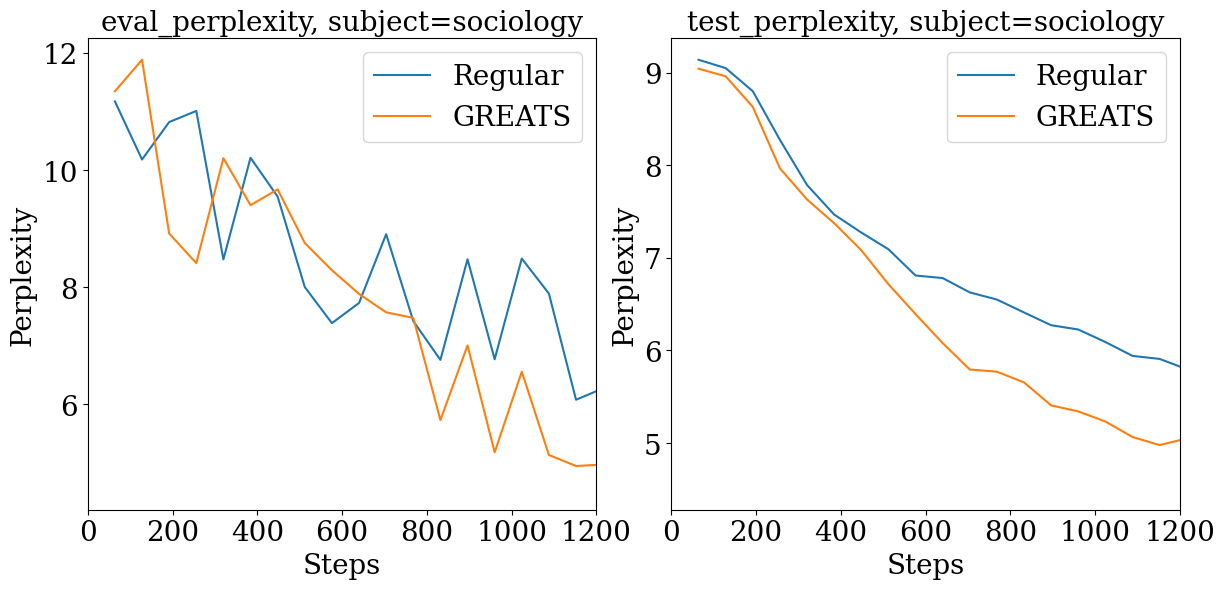

In [11]:
plt.figure(figsize=(12, 6))  # Set the figure size to be wider

subject = 'sociology'

dir = '/scratch/gpfs/tw8948/GREATS_Result/'

# Create subplots with 1 row and 2 columns
for i, mode in enumerate(['eval_perplexity', 'test_perplexity']):
    ax = plt.subplot(1, 2, i + 1)  # Creates a subplot in the 1st or 2nd position

    file_path = 'Llama-2-Regular-BS4-TrainPct0.05-{}-NVAL5-NTEST500-LoRA_R128_Alpha1.0_Dropout0.1-LR2e-05-Seed11_results.json'.format(
        subject)
    test_loss_array = extract_test_loss(dir+file_path, mode)
    ax.plot(np.arange(1, len(test_loss_array)+1) * 64, test_loss_array, label='Regular')

    file_path = 'Llama-2-GREATS-BS4-TrainPct0.05-{}-NVAL5-NTEST500-LoRA_R128_Alpha1.0_Dropout0.1-LR2e-05-Seed11-FRACINV2.0_results.json'.format(
        subject)
    test_loss_array = extract_test_loss(dir+file_path, mode)
    ax.plot(np.arange(1, len(test_loss_array)+1) * 64, test_loss_array, label='GREATS')

    ax.set_title('{}, subject={}'.format(mode, subject))
    ax.legend()
    ax.set_xlabel('Steps')
    ax.set_ylabel('Perplexity')

    ax.set_xlim([0, 1200])

plt.tight_layout()
plt.show()